In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker


In [2]:
download_url = ("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

df = pd.read_csv(download_url)

type(df)

C:\Users\mimancin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


pandas.core.frame.DataFrame

In [3]:
pd.set_option("display.max.columns", None)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
##Evaluating Missing Data

missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

# Convert DF eliminating descriptive variables and features with too many nulls

In [7]:
finedf = df.iloc[:,[0,7,8,13 ,14 ,15 ,16,17,18,19,22,23,24,26,27,28,29,33,34,35,36,37]]

In [9]:
finedf.head()

,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Matched,Intersection,2,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,Matched,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,Matched,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,Matched,Block,1,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,Matched,Intersection,2,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [8]:
finedf.shape

(194673, 22)

In [11]:
finedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   STATUS          194673 non-null  object
 2   ADDRTYPE        192747 non-null  object
 3   SEVERITYCODE.1  194673 non-null  int64 
 4   SEVERITYDESC    194673 non-null  object
 5   COLLISIONTYPE   189769 non-null  object
 6   PERSONCOUNT     194673 non-null  int64 
 7   PEDCOUNT        194673 non-null  int64 
 8   PEDCYLCOUNT     194673 non-null  int64 
 9   VEHCOUNT        194673 non-null  int64 
 10  JUNCTIONTYPE    188344 non-null  object
 11  SDOT_COLCODE    194673 non-null  int64 
 12  SDOT_COLDESC    194673 non-null  object
 13  UNDERINFL       189789 non-null  object
 14  WEATHER         189592 non-null  object
 15  ROADCOND        189661 non-null  object
 16  LIGHTCOND       189503 non-null  object
 17  ST_COLCODE      194655 non-nu

In [9]:

print(finedf.dtypes)

SEVERITYCODE       int64
STATUS            object
ADDRTYPE          object
SEVERITYCODE.1     int64
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
SDOT_COLDESC      object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
ST_COLDESC        object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object


In [10]:
finedf.describe()

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.946730e+05
mean,1.298901,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,269.401114,9.782452e+03
std,0.457778,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,3315.776055,7.226926e+04
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.000000e+00
75%,2.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.000000e+00
max,2.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,525241.000000,5.239700e+06


In [14]:
#converrting categorical values into numerical values - evaluation
pd.get_dummies(finedf['ROADCOND'])

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
194668,1,0,0,0,0,0,0,0,0
194669,0,0,0,0,0,0,0,0,1
194670,1,0,0,0,0,0,0,0,0
194671,1,0,0,0,0,0,0,0,0


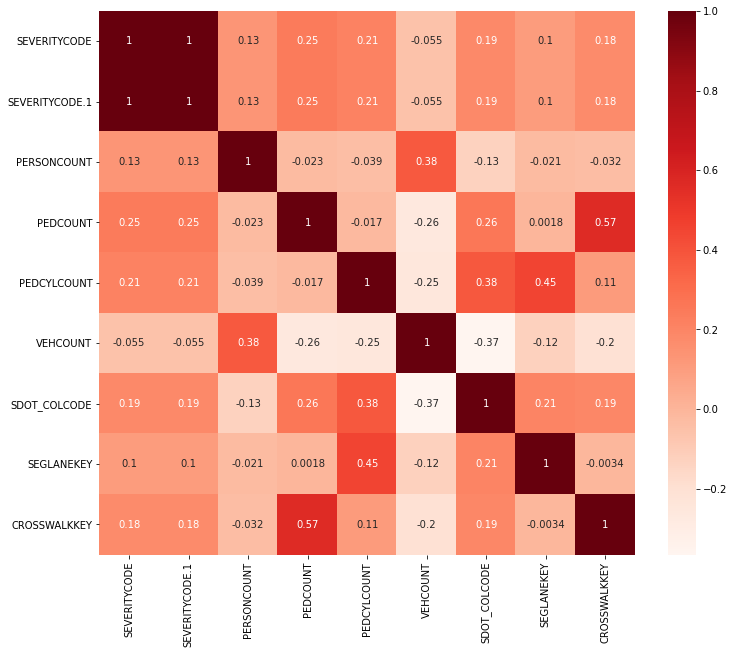

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = finedf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
finedf.dtypes

SEVERITYCODE       int64
STATUS            object
ADDRTYPE          object
SEVERITYCODE.1     int64
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
SDOT_COLDESC      object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
ST_COLDESC        object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object

In [12]:
##Conversion of object features to category
to_convert = ['WEATHER', 'ROADCOND', 'LIGHTCOND'];  

In [13]:
finedf[to_convert] = finedf[to_convert].astype('category')

C:\Users\mimancin\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
finedf.dtypes

SEVERITYCODE         int64
STATUS              object
ADDRTYPE            object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
UNDERINFL           object
WEATHER           category
ROADCOND          category
LIGHTCOND         category
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR        object
dtype: object

In [15]:
maindf = finedf.iloc[:,[0,14,15,16]]

In [16]:
maindf.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [20]:
maindf.dtypes

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [20]:
maindf["WEATHER_CAT"] = maindf["WEATHER"].cat.codes

<ipython-input-20-15439d907535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindf["WEATHER_CAT"] = maindf["WEATHER"].cat.codes


In [17]:
maindf["ROADCOND_CAT"] = maindf["ROADCOND"].cat.codes

<ipython-input-17-4e80000390a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindf["ROADCOND_CAT"] = maindf["ROADCOND"].cat.codes


In [19]:
maindf["LIGHTCOND_CAT"] = maindf["LIGHTCOND"].cat.codes

<ipython-input-19-a03f85609901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindf["LIGHTCOND_CAT"] = maindf["LIGHTCOND"].cat.codes


In [21]:
maindf.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
WEATHER_CAT          int8
dtype: object

In [22]:
maindf.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
0,2,Overcast,Wet,Daylight,8,5,4
1,1,Raining,Wet,Dark - Street Lights On,8,2,6
2,1,Overcast,Dry,Daylight,0,5,4
3,1,Clear,Dry,Daylight,0,5,1
4,2,Raining,Wet,Daylight,8,5,6


In [26]:
maindf.describe()

,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.977254,2.507122,4.256420
std,0.457778,2.892011,3.648660,1.900722
min,1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,5.000000
75%,2.000000,6.000000,7.000000,5.000000
max,2.000000,10.000000,8.000000,8.000000


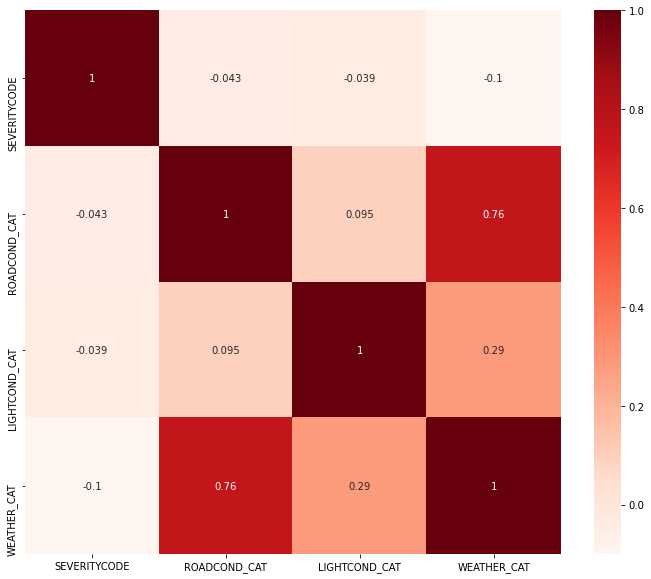

In [35]:
#Using Pearson Correlation to verify correlation
plt.figure(figsize=(12,10))
cor = maindf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
##how many values there are for SEVERITYCODE?
maindf['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [37]:
finaldf = maindf.iloc[:,[0,4,5,6]]

In [38]:
##Train model on imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Train model on imbalanced dataPython
# Separate input features (X) and target variable (y)
y = finaldf.SEVERITYCODE
X = finaldf.drop('SEVERITYCODE', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [26]:
##accuracy is 0.7 ...low
print( accuracy_score(pred_y_0, y) )

0.7010987656223513


In [27]:
from sklearn.utils import resample

# DOWNSAMPLING TO OBTAIN BALANCE

In [39]:
## 1) separate observations from each class into different DataFrames.
## 2)resample the majority class without replacement, setting the number of samples to match that of the minority class.
## 3)combine the down-sampled majority class DataFrame with the original minority class DataFrame.
# Separate majority and minority classes
df_majority = finaldf[finaldf.SEVERITYCODE==1]
df_minority = finaldf[finaldf.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [42]:
df_downsampled.head()

,SEVERITYCODE,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
25055,1,8,2,6
65280,1,0,5,1
86292,1,7,8,10
155111,1,0,5,1
64598,1,0,5,1


# K Nearest Neighbor(KNN)

# Feature selection

In [47]:
X = df_downsampled.iloc[:, 1:4] 

In [48]:
print(X)

        ROADCOND_CAT  LIGHTCOND_CAT  WEATHER_CAT
25055              8              2            6
65280              0              5            1
86292              7              8           10
155111             0              5            1
64598              0              5            1
...              ...            ...          ...
194663             8              5            6
194666             8              5            1
194668             0              5            1
194670             0              5            1
194671             0              6            1

[116376 rows x 3 columns]


In [49]:
y = df_downsampled['SEVERITYCODE'].values

# Data Normalization

In [50]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.52797946, -1.21648407,  1.15236718],
       [-0.67084969,  0.42978835, -0.67488   ],
       [ 1.25312582,  2.07606076,  2.61416492],
       [-0.67084969,  0.42978835, -0.67488   ],
       [-0.67084969,  0.42978835, -0.67488   ]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
 
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 1, 1, 2], dtype=int64)

In [55]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5542638989479887
Test set Accuracy:  0.5561538681866354


In [57]:
#Calculate the accuracy of KNN for different Ks
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51800189, 0.51184373, 0.55414888, 0.51144273, 0.55042534,
       0.55578151, 0.55157105, 0.56045026, 0.55518002, 0.55088363,
       0.55595337, 0.55996334, 0.5608799 , 0.56053619, 0.56056483,
       0.5604789 , 0.56036433, 0.56039298, 0.56024976, 0.56024976,
       0.56466073, 0.55987741, 0.56408788, 0.56371552])

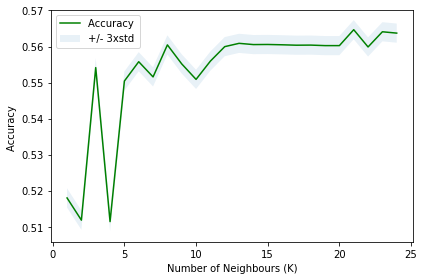

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5646607280955518 with k= 21


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#Modelling
accidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
accidentTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [64]:
accidentTree.fit(X_trainset,y_trainset)
pred_Dtree=accidentTree.predict(X_test)
print(pred_Dtree)
print(y_test)

[2 2 1 ... 2 2 2]
[2 2 1 ... 1 1 2]


In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainset,y_trainset)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5685847678515167


In [ ]:
#conda install pydotplus

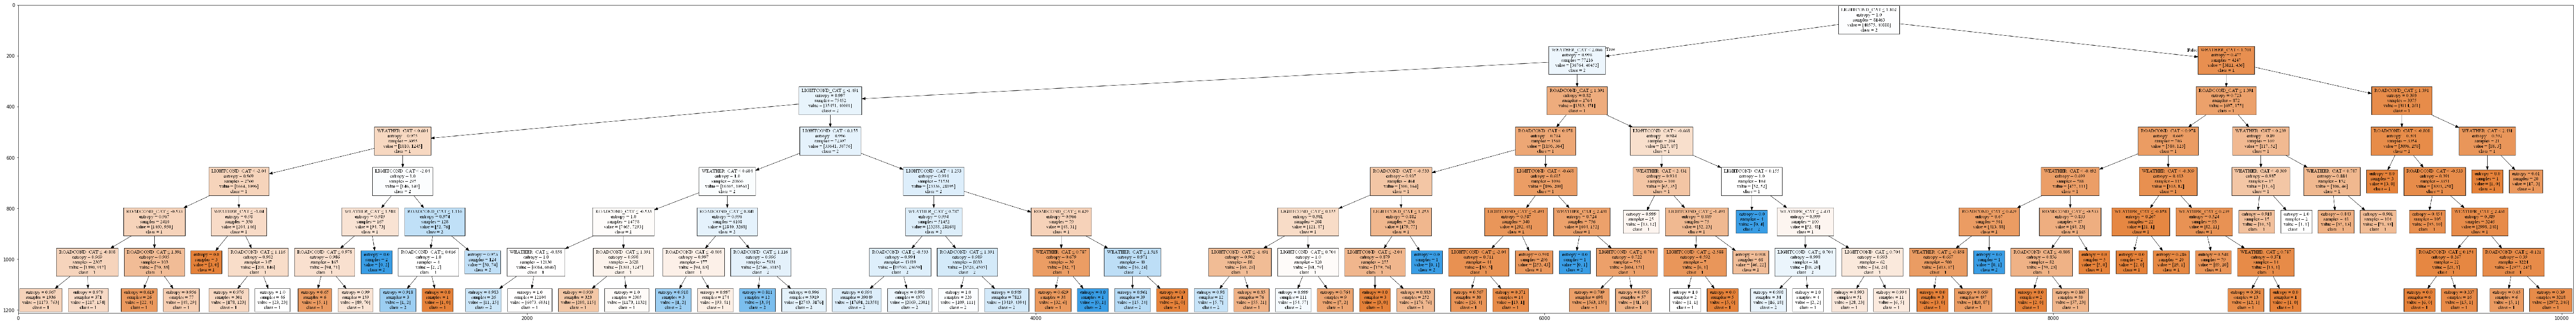

In [74]:
# !conda install -c conda-forge pydotplus -y
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "accident.png"
featureNames = df_downsampled.columns[1:4]
targetNames = df_downsampled['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(accidentTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5405110440646493

# Support Vector Machine

In [85]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)

SVC()

In [86]:
yhat = clf.predict(X_test)
yhat [0:5]
from sklearn.metrics import classification_report, confusion_matrix
import itertools


              precision    recall  f1-score   support

           1       0.62      0.34      0.44     17409
           2       0.55      0.79      0.65     17504

    accuracy                           0.57     34913
   macro avg       0.58      0.57      0.54     34913
weighted avg       0.58      0.57      0.54     34913



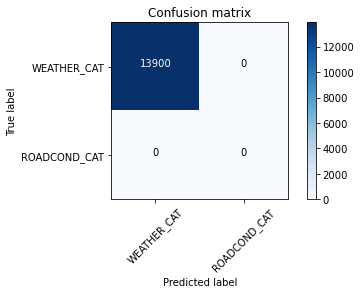

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['WEATHER_CAT','ROADCOND_CAT'],normalize= False,  title='Confusion matrix')


# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR = LogisticRegression(C=5, solver='liblinear').fit(X_train,y_train)
LogR

LogisticRegression(C=5, solver='liblinear')

In [90]:
yhat = LogR.predict(X_test)
yhat
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

array([[0.57, 0.43],
       [0.47, 0.53],
       [0.68, 0.32],
       ...,
       [0.47, 0.53],
       [0.47, 0.53],
       [0.47, 0.53]])

In [94]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6849535354964341

# Test set Evaluation

In [97]:
#test the KNN algorithm already trained with K=6
yhatKNN=neigh.predict(X)
#KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
#print("KNN Jaccard Score: %.2f" % KNNJaccard)


yhatDEC = accidentTree.predict(X)
#DTJaccard = jaccard_similarity_score(y, yhatDEC)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
#print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

yhatSVM=clf.predict(X)
#SVMJaccard = jaccard_similarity_score(y, yhatSVM)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score: %.2f" % SVMF1)
#print("SVM Jaccard score: %.2f" % SVMJaccard)

yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
#LogRJaccard = jaccard_similarity_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
#print("LOG Jaccard score: %.4f" % LogRJaccard)

Avg F1-score: 0.54
Avg F1-score: 0.54
Avg F1-score: 0.54
LogLoss: : 0.68
Avg F1-score: 0.5131
